## 0. Introduction

Digit Recognizer is a Multiclass Classification project involving image recognition. We have to classify handwritten digits as 0 to 9.

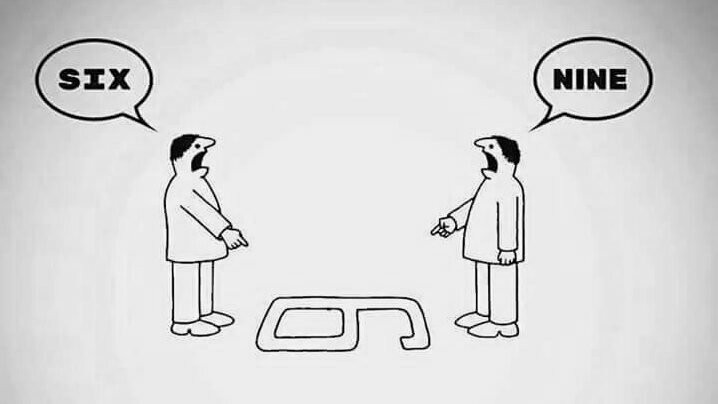

MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.

In this competition, your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images. We’ve curated a set of tutorial-style kernels which cover everything from regression to neural networks. We encourage you to experiment with different algorithms to learn first-hand what works well and how techniques compare.

### Intro to Convolutional Neural Networks

Convolutional neural networks (CNNs) are the current state-of-the-art model
architecture for image classification tasks. CNNs apply a series of filters to
the raw pixel data of an image to extract and learn higher-level features, which
the model can then use for classification. CNNs contains three components:

*   **Convolutional layers**, which apply a specified number of convolution
    filters to the image. For each subregion, the layer performs a set of
    mathematical operations to produce a single value in the output feature map.
    Convolutional layers then typically apply a
    [ReLU activation function](https://en.wikipedia.org/wiki/Rectifier_\(neural_networks\)) to
    the output to introduce nonlinearities into the model.

*   **Pooling layers**, which
    [downsample the image data](https://en.wikipedia.org/wiki/Convolutional_neural_network#Pooling_layer)
    extracted by the convolutional layers to reduce the dimensionality of the
    feature map in order to decrease processing time. A commonly used pooling
    algorithm is max pooling, which extracts subregions of the feature map
    (e.g., 2x2-pixel tiles), keeps their maximum value, and discards all other
    values.

*   **Dense (fully connected) layers**, which perform classification on the
    features extracted by the convolutional layers and downsampled by the
    pooling layers. In a dense layer, every node in the layer is connected to
    every node in the preceding layer.

Typically, a CNN is composed of a stack of convolutional modules that perform
feature extraction. Each module consists of a convolutional layer followed by a
pooling layer. The last convolutional module is followed by one or more dense
layers that perform classification. The final dense layer in a CNN contains a
single node for each target class in the model (all the possible classes the
model may predict), with a
[softmax](https://en.wikipedia.org/wiki/Softmax_function) activation function to
generate a value between 0–1 for each node (the sum of all these softmax values
is equal to 1). We can interpret the softmax values for a given image as
relative measurements of how likely it is that the image falls into each target
class.

## 1. Import Libraries

In [82]:
# Data wrangling

import numpy as np 
import pandas as pd
import os

# Data visualization
import matplotlib.pyplot as plt
%matplotlib inline

# Machine learnin

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split

# Hide warnings

import warnings
warnings.simplefilter('ignore')


## 2. Exploratory Data Analysis

### 2.1 Loading the data

In [83]:
# Set the path

PATH="../input/digit-recognizer"
os.listdir(PATH)

['sample_submission.csv', 'train.csv', 'test.csv']

In [84]:
# Loading the data

train=pd.read_csv(f'{PATH}/train.csv')
test=pd.read_csv(f'{PATH}/test.csv')

### 2.2 Loking at the data

In [85]:
# Sample 10 random rows from train dataframe

train.sample(10)

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
34174,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25939,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10617,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41245,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9134,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25746,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9874,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
37982,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17578,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
36387,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [86]:
# Looking at train shape

train.shape

(42000, 785)

In [87]:
# Sample 10 random rows from test dataframe

test.sample(10)

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
6655,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
89,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8172,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
26412,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5949,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17415,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8792,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6866,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7566,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6408,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [88]:
# Looking at test shape

test.shape

(28000, 784)

### 2.3 Preprocessing

In [89]:
#Sepating the labeles from the data

y = train['label']
X=train.drop(["label"],axis=1)

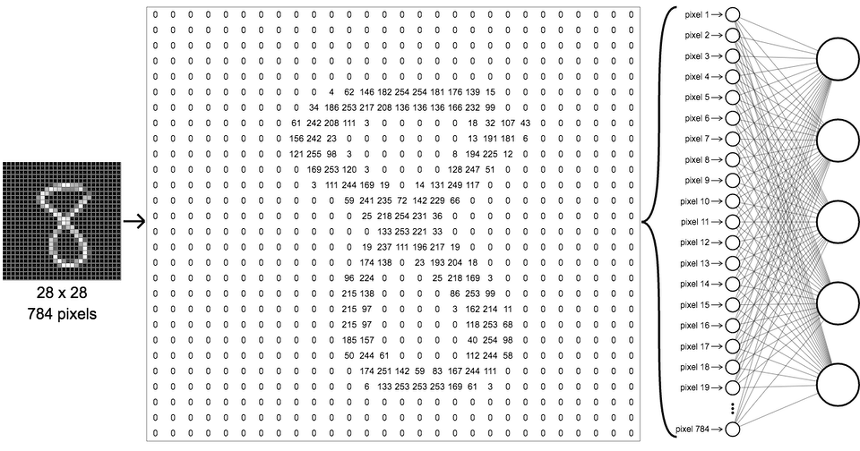

In [90]:
#Each image is 28 pixels wide and 28 pixles long. Reshaping to 28 x 28 x 1

X= X.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [91]:
# Normalizing the image 

X = X.astype("float32") / 255
X_test = test.astype("float32") / 255


## 3. Data visualization

### 3.1 Visualizng trian images

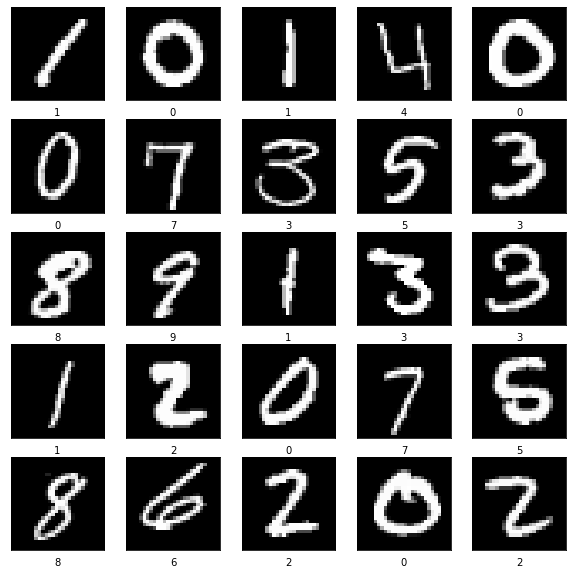

In [92]:
plt.figure(figsize=(10,10))
for i, image in enumerate(X[:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(train['label'][i])
plt.show()

### 3.2 Visualizng test images

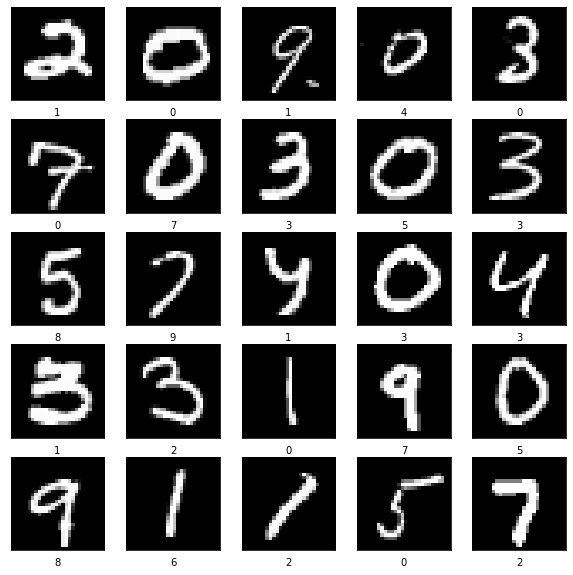

In [93]:
plt.figure(figsize=(10,10))
for i, image in enumerate(test[:25]):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(image, cmap='gray')
    plt.xlabel(train['label'][i])
plt.show()

## 4. Model


### 4.1 Preparation

In [94]:
# Model / data parameters

num_classes = 10
input_shape = (28, 28, 1)

In [95]:
# Split between train and validation set

X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2)

In [96]:
# convert class vectors to binary class matrices

Y_train = keras.utils.to_categorical(Y_train, num_classes)
Y_val = keras.utils.to_categorical(Y_val, num_classes)

### 4.2 Model Building 


Defining the Model (Convolutional Neural Network)

The 2D convolution is a fairly simple operation at heart: you start with a kernel, which is simply a small matrix of weights. This kernel “slides” over the 2D input data, performing an elementwise multiplication with the part of the input it is currently on, and then summing up the results into a single output pixel. - [SOURCE- read more click here](https://towardsdatascience.com/intuitively-understanding-convolutions-for-deep-learning-1f6f42faee1)

![A standard convolution](https://miro.medium.com/max/535/1*Zx-ZMLKab7VOCQTxdZ1OAw.gif)


Below is a function defining a CNN model with 3 main blocks of Convolutional layers. The first two blocks follow the same structure:
1. Apply a Conv2D layer with 3x3 kernel size and valid padding, then another Conv2D layer with 3x3 kernel but with same padding to keep the same dimensions
2. Apply a BatchNormalization layer to avoid layers being too depended from one another and allowing each activation to have 0 mean
3. A RELU activation and a MaxPooling2D layer with 2x2 kernel size and stride=2
4. An element-wise Dropout layer applied to MaxPooling2D keeping 80% of the activation units

The final 2 layers consists of a Fully Connected Layer that uses a Softmax activation for classifica

In [97]:
model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),

        layers.Flatten(),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 1600)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)               

### 4.3 Fitting


In [98]:
#Here we will use an Adam optimizer with a Cross entropy loss function.

batch_size = 128
epochs = 15

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

model.fit(X_train, Y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/15
237/237 [==============================] - 1s 4ms/step - loss: 0.5139 - accuracy: 0.8457 - val_loss: 0.1322 - val_accuracy: 0.9622
Epoch 2/15
237/237 [==============================] - 1s 5ms/step - loss: 0.1421 - accuracy: 0.9566 - val_loss: 0.0882 - val_accuracy: 0.9738
Epoch 3/15
237/237 [==============================] - 1s 4ms/step - loss: 0.1027 - accuracy: 0.9681 - val_loss: 0.0712 - val_accuracy: 0.9792
Epoch 4/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0847 - accuracy: 0.9732 - val_loss: 0.0610 - val_accuracy: 0.9815
Epoch 5/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0720 - accuracy: 0.9771 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 6/15
237/237 [==============================] - 1s 4ms/step - loss: 0.0633 - accuracy: 0.9812 - val_loss: 0.0455 - val_accuracy: 0.9842
Epoch 7/15
237/237 [==============================] - 1s 5ms/step - loss: 0.0584 - accuracy: 0.9810 - val_loss: 0.0509 - val_accuracy: 0.9836
Epoch 

### 4.4 Evaluating

In [99]:
#Evaluating the model on validation data

score = model.evaluate(X_val, Y_val, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.04668251425027847
Test accuracy: 0.9854761958122253


### 4.5 Predicting


In [100]:
# Predicting 

y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

## 5. Submission

In [101]:
y_pred = pd.Series(y_pred, name='Label')

In [102]:
sub = pd.concat([pd.Series(range(1, 28001), name="ImageId"), y_pred], axis=1)

In [103]:
sub.to_csv("submission.csv", index=False)

## 6. Acknowledgements

keras.io - Simple MNIST convnet : https://keras.io/examples/vision/mnist_convnet/

kernel by KAMAL DAS : https://www.kaggle.com/code/kmldas/mnist-digit-classification-cnn-beginner-s-guide

kernel by ARUNKUMAR VENKATARAMANAN : https://www.kaggle.com/code/arunkumarramanan/awesome-deep-learning-with-cnn-mnist-classifier 